In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.preprocessing import image

In [4]:
# Performing Data Augmentation and loading training images

train_dir = 'C:/Users/HP/OneDrive/Desktop/New folder/Original Images/Original Images'
generator = ImageDataGenerator()
train_ds=generator.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
classes = list(train_ds.class_indices.keys())


Found 2562 images belonging to 31 classes.


In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(len(classes),activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                      

In [10]:
# fitting the data to the Model
history = model.fit(train_ds,epochs = 30, batch_size=32)

Epoch 1/30
81/81 [==============================] - 99s 1s/step - loss: 3.5059 - accuracy: 0.0870
Epoch 2/30
81/81 [==============================] - 98s 1s/step - loss: 2.7573 - accuracy: 0.2037
Epoch 3/30
81/81 [==============================] - 99s 1s/step - loss: 2.2690 - accuracy: 0.3337
Epoch 4/30
81/81 [==============================] - 95s 1s/step - loss: 1.8695 - accuracy: 0.4457
Epoch 5/30
81/81 [==============================] - 106s 1s/step - loss: 1.5173 - accuracy: 0.5558
Epoch 6/30
81/81 [==============================] - 114s 1s/step - loss: 1.2317 - accuracy: 0.6362
Epoch 7/30
81/81 [==============================] - 105s 1s/step - loss: 1.0607 - accuracy: 0.6788
Epoch 8/30
81/81 [==============================] - 109s 1s/step - loss: 0.7792 - accuracy: 0.7678
Epoch 9/30
81/81 [==============================] - 106s 1s/step - loss: 0.6456 - accuracy: 0.8212
Epoch 10/30
81/81 [==============================] - 107s 1s/step - loss: 0.5207 - accuracy: 0.8384
Epoch 11/30
8

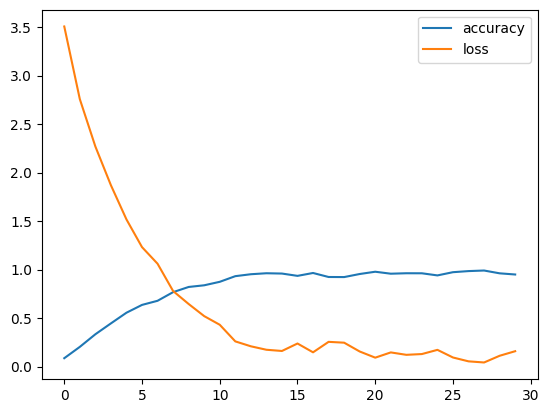

In [11]:
# Plotting the accuracy and Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy','loss'])
plt.show()

In [14]:
# Function to preform face recognition
def predict_image(image_path):
    img = load_img(image_path,target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    X = img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: " +classes[np.argmax(pred)])

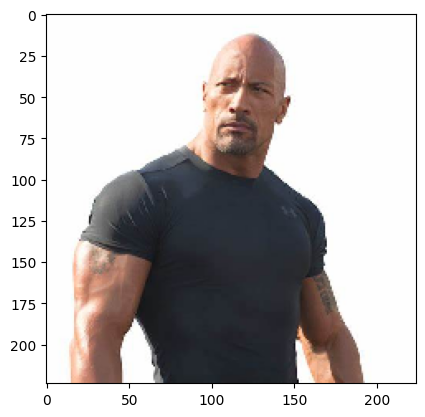

1/1 [==============================] - 0s 28ms/step
Actual: Dwayne Johnson
Predicted: Dwayne Johnson


In [17]:
predict_image('C:/Users/HP/OneDrive/Desktop/New folder/Original Images/Original Images/Dwayne Johnson/Dwayne Johnson_26.jpg')


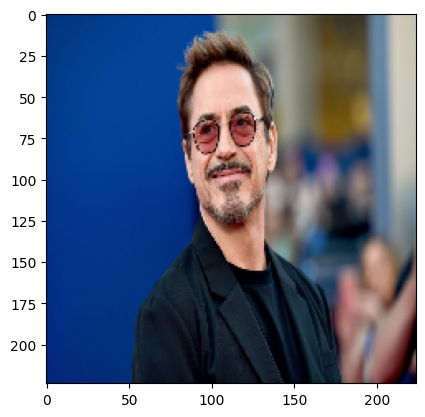

1/1 [==============================] - 0s 29ms/step
Actual: Robert Downey Jr
Predicted: Robert Downey Jr


In [18]:
predict_image('C:/Users/HP/OneDrive/Desktop/New folder/Original Images/Original Images/Robert Downey Jr/Robert Downey Jr_16.jpg')


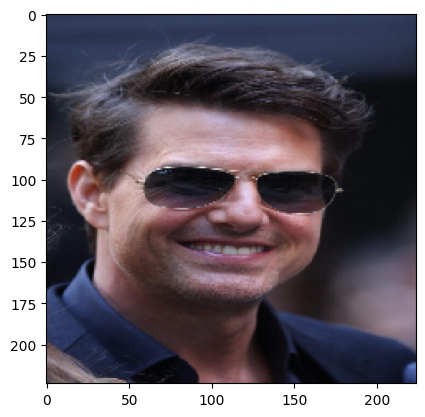

1/1 [==============================] - 0s 28ms/step
Actual: Tom Cruise
Predicted: Tom Cruise


In [19]:
predict_image('C:/Users/HP/OneDrive/Desktop/New folder/Original Images/Original Images/Tom Cruise/Tom Cruise_27.jpg')


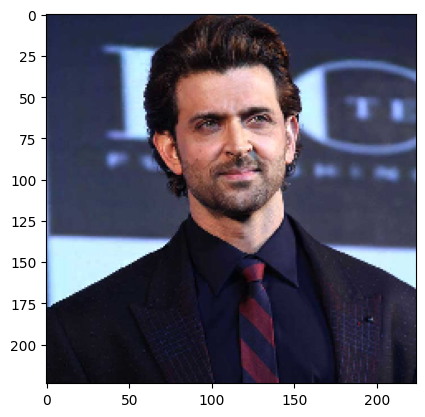

1/1 [==============================] - 0s 27ms/step
Actual: Hrithik Roshan
Predicted: Hrithik Roshan


In [20]:
predict_image('C:/Users/HP/OneDrive/Desktop/New folder/Original Images/Original Images/Hrithik Roshan/Hrithik Roshan_19.jpg')
